In [9]:
import pandas as pd
import seaborn as sns
import numpy as np

average_correlation = pd.read_csv('../average_correlation_matrix.csv', index_col=0)
average_correlation


,K1,K14,K15,K2,K3,K4,K5,K7,LANA,Orf10,...,Orf67,Orf68,Orf69,Orf7,Orf70,Orf8,Orf9,vIRF1,vIRF2,vIRF4
K1,1.000000,0.431397,0.089735,0.271017,0.184781,0.290918,0.373761,0.313811,0.340167,0.370072,...,0.248528,-0.018085,0.251307,0.396904,0.238422,0.398816,0.470258,0.229243,0.211747,0.223686
K14,0.431397,1.000000,0.557989,0.594787,0.520712,0.507301,0.443679,0.609572,0.769794,0.611961,...,0.627707,0.360511,0.715968,0.634914,0.455124,0.626742,0.599966,0.751996,0.528935,0.687882
K15,0.089735,0.557989,1.000000,0.398219,0.144964,0.112921,0.009892,0.338204,0.740032,0.333666,...,0.432647,0.715067,0.829518,0.359940,0.156643,0.313608,0.208144,0.639593,0.472855,0.527738
K2,0.271017,0.594787,0.398219,1.000000,0.580200,0.634742,0.613633,0.771647,0.717503,0.840891,...,0.667291,0.190407,0.708208,0.708406,0.594477,0.841821,0.738512,0.591926,0.367530,0.741872
K3,0.184781,0.520712,0.144964,0.580200,1.000000,0.837607,0.593356,0.657184,0.413023,0.684201,...,0.596828,-0.019912,0.375666,0.492431,0.833162,0.545447,0.633381,0.508109,0.293566,0.655102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Orf8,0.398816,0.626742,0.313608,0.841821,0.545447,0.602038,0.574024,0.711349,0.626339,0.850759,...,0.712416,0.136123,0.636263,0.767337,0.472981,1.000000,0.871275,0.586737,0.287060,0.765628
Orf9,0.470258,0.599966,0.208144,0.738512,0.633381,0.650009,0.624743,0.750595,0.559953,0.835250,...,0.710768,0.027649,0.561446,0.775450,0.577688,0.871275,1.000000,0.483436,0.202731,0.750208
vIRF1,0.229243,0.751996,0.639593,0.591926,0.508109,0.479244,0.257162,0.497789,0.697491,0.574568,...,0.741132,0.568322,0.755250,0.582306,0.395890,0.586737,0.483436,1.000000,0.661492,0.852661
vIRF2,0.211747,0.528935,0.472855,0.367530,0.293566,0.353589,0.068140,0.335008,0.487966,0.307617,...,0.291429,0.584525,0.476167,0.408721,0.285215,0.287060,0.202731,0.661492,1.000000,0.453974


<Axes: >

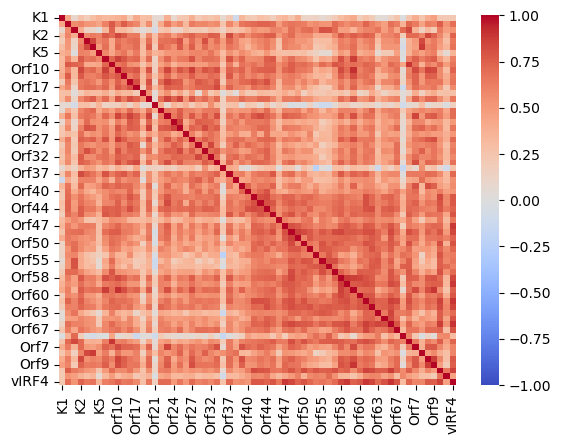

In [10]:
sns.heatmap(average_correlation, cmap='coolwarm', vmin=-1, vmax=1)

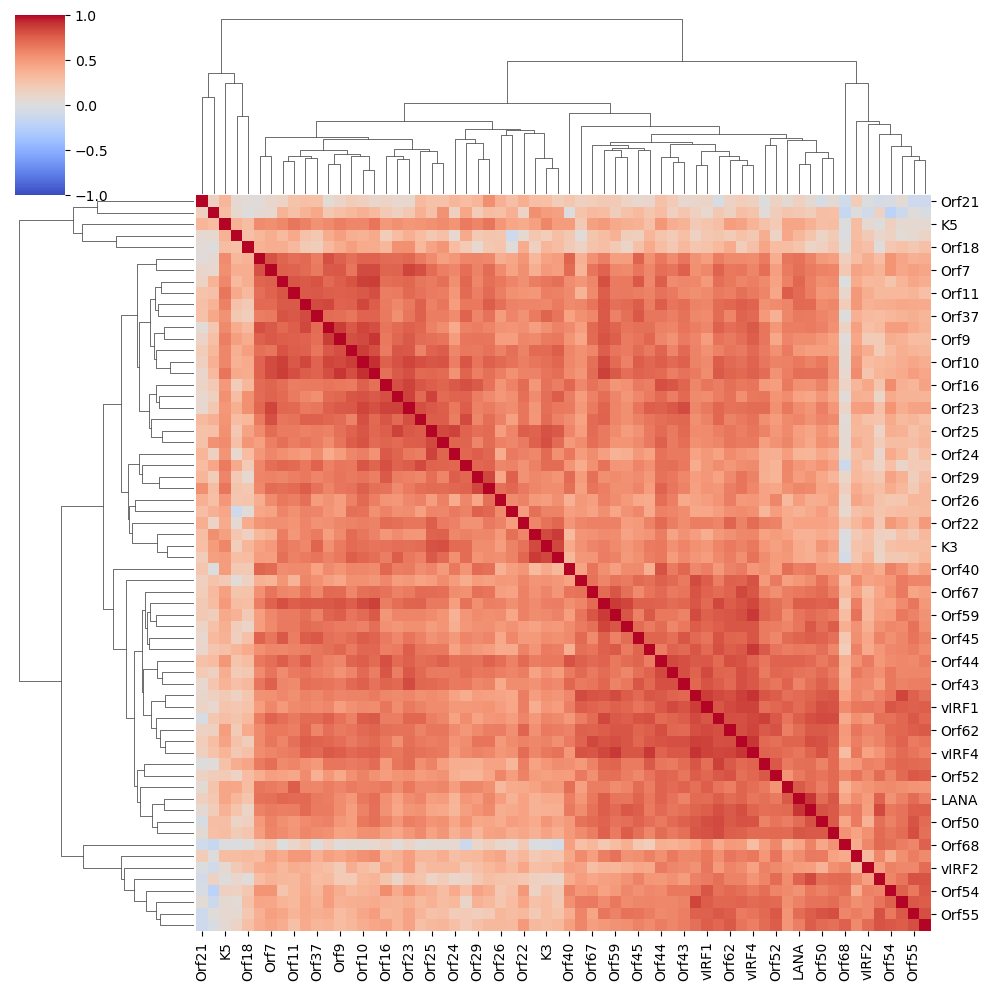

In [11]:
sns.clustermap(average_correlation, cmap='coolwarm', vmin=-1, vmax=1)

<Axes: xlabel='K1', ylabel='Count'>

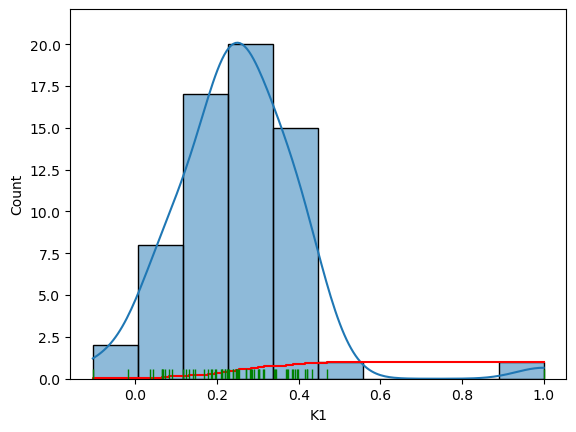

In [12]:
sns.histplot(average_correlation.iloc[0], bins=10, kde=True)
sns.ecdfplot(data=average_correlation.iloc[0], color='red')
sns.rugplot(data=average_correlation.iloc[0], color='green')

In [13]:
row_sum = average_correlation.dot(pd.Series(1, index=average_correlation.columns))
row_sum

K1       16.109826
K14      37.167039
K15      26.332175
K2       39.608712
K3       34.898377
           ...    
Orf8     38.429214
Orf9     37.721111
vIRF1    39.644802
vIRF2    26.228134
vIRF4    42.302005
Length: 64, dtype: float64

<Axes: ylabel='Count'>

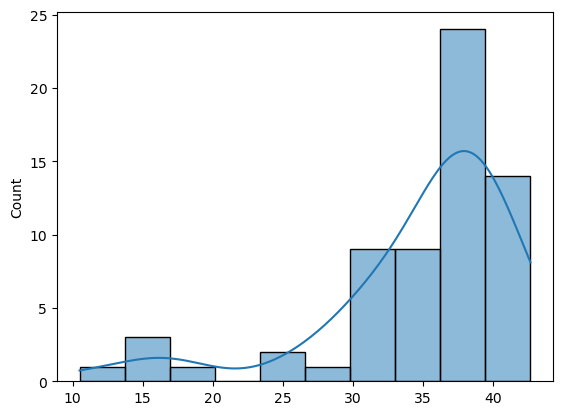

In [14]:
sns.histplot(row_sum, bins=10, kde=True)

In [15]:
row_mean = average_correlation.dot(pd.Series(1/average_correlation.shape[1], index=average_correlation.columns))
row_mean


K1       0.251716
K14      0.580735
K15      0.411440
K2       0.618886
K3       0.545287
           ...   
Orf8     0.600456
Orf9     0.589392
vIRF1    0.619450
vIRF2    0.409815
vIRF4    0.660969
Length: 64, dtype: float64

## Order and Merge

In [23]:
def merge_two_clusters(mat, i, j, new_label):
    """
    Given a symmetric correlation matrix (DataFrame), merge the clusters corresponding 
    to index labels i and j by averaging their rows (and columns).
    
    Returns an updated DataFrame with a new row/column named `new_label` and with i and j removed.
    """
    # Copy the two rows to merge
    row_i = mat.loc[i]
    row_j = mat.loc[j]
    # Compute the new merged row as the average
    new_row = (row_i + row_j) / 2
    new_row[new_label] = 1.0 # diagonal is 1

    # Create a new DataFrame without rows/columns i and j
    mat_reduced = mat.drop(index=[i, j], columns=[i, j])
    
    # For all remaining clusters, set the new cell value as the average of the corresponding cells from i and j
    # (this is already done implicitly by taking the average in the merged row,
    # but we must also add the new column in the reduced matrix)
    # We append the new row/column to the reduced matrix:
    mat_reduced[new_label] = new_row.drop(new_label)  # add a new column
    new_row_full = new_row.copy()
    # Append as a new row (need to conform with order of columns)
    new_row_full = new_row_full.reindex(mat_reduced.index.tolist() + [new_label])
    # Add the new row to the bottom of the DataFrame
    mat_reduced.loc[new_label] = new_row_full[:-1]
    
    # Now, ensure the matrix is symmetric. (It should be, since we averaged.)
    mat_reduced = mat_reduced.reindex(index=mat_reduced.columns)
    return mat_reduced

def iterative_merge(mat, target_size=10):
    """
    Iteratively merge the two most similar clusters (rows) until the matrix size reaches target_size.
    
    mat: DataFrame of correlations (symmetric, with diagonal 1)
    target_size: desired number of rows (and columns) after merging.
    
    Returns the merged matrix and a list of merge labels.
    """
    merged_mat = mat.copy()
    merge_count = 0
    merge_history = []  # keep track of merges, if desired

    # Loop until matrix dims are target_size x target_size
    while merged_mat.shape[0] > target_size:
        # We want to find the pair (i, j) of different rows with the highest correlation
        # (excluding diagonal ones which are 1).
        # Set the diagonal to -inf temporarily so that we don't pick it.
        temp = merged_mat.copy()
        np.fill_diagonal(temp.values, -np.inf)
        # Find the pair with maximum correlation
        idx = np.unravel_index(np.argmax(temp.values), temp.shape)
        i, j = temp.index[idx[0]], temp.columns[idx[1]]
        max_corr = temp.loc[i, j]
        
        # Define a new label for the merged cluster (for example, by concatenating the gene names)
        new_label = f"({i}+{j})"
        merge_history.append((i, j, new_label, max_corr))
        print(f"Merging: {i} and {j} => {new_label} (corr = {max_corr:.3f})")
        
        # Merge the two clusters
        merged_mat = merge_two_clusters(merged_mat, i, j, new_label)
                
    return merged_mat, merge_history

# Iteratively merge until the matrix is 10 x 10
merged_matrix, merges = iterative_merge(average_correlation, target_size=10)
np.fill_diagonal(merged_matrix.values, 1)


Merging: Orf10 and Orf6 => (Orf10+Orf6) (corr = 0.912)
Merging: Orf66 and vIRF4 => (Orf66+vIRF4) (corr = 0.901)
Merging: LANA and Orf69 => (LANA+Orf69) (corr = 0.892)
Merging: Orf58 and Orf59 => (Orf58+Orf59) (corr = 0.882)
Merging: K4 and Orf70 => (K4+Orf70) (corr = 0.876)
Merging: Orf61 and (Orf66+vIRF4) => (Orf61+(Orf66+vIRF4)) (corr = 0.876)
Merging: Orf8 and Orf9 => (Orf8+Orf9) (corr = 0.871)
Merging: K7 and (Orf10+Orf6) => (K7+(Orf10+Orf6)) (corr = 0.866)
Merging: Orf48 and Orf49 => (Orf48+Orf49) (corr = 0.862)
Merging: vIRF1 and (Orf61+(Orf66+vIRF4)) => (vIRF1+(Orf61+(Orf66+vIRF4))) (corr = 0.860)
Merging: Orf20 and Orf23 => (Orf20+Orf23) (corr = 0.857)
Merging: Orf24 and Orf25 => (Orf24+Orf25) (corr = 0.855)
Merging: Orf29 and Orf32 => (Orf29+Orf32) (corr = 0.840)
Merging: Orf42 and Orf44 => (Orf42+Orf44) (corr = 0.836)
Merging: K3 and (K4+Orf70) => (K3+(K4+Orf70)) (corr = 0.835)
Merging: Orf17 and Orf34 => (Orf17+Orf34) (corr = 0.835)
Merging: Orf16 and (Orf20+Orf23) => (Orf16

In [24]:
print("Final merged matrix (10x10):")
merged_matrix

Final merged matrix (10x10):


,K1,K5,Orf18,Orf21,Orf36,Orf46,(((Orf4+Orf7)+(((Orf8+Orf9)+(Orf27+(K7+(Orf10+Orf6))))+(Orf11+(K2+Orf37))))+(Orf40+(K14+(Orf45+(Orf43+(Orf42+Orf44)))))),(((Orf52+(Orf47+(Orf48+Orf49)))+((Orf60+(Orf58+Orf59))+((LANA+Orf69)+((Orf55+Orf57)+(Orf50+(Orf62+(vIRF1+(Orf61+(Orf66+vIRF4)))))))))+(Orf65+Orf67)),(vIRF2+((Orf54+Orf63)+(Orf68+(K15+Orf56)))),(Orf26+((Orf39+(Orf29+Orf32))+(Orf22+((K3+(K4+Orf70))+((Orf30+(Orf24+Orf25))+((Orf17+Orf34)+(Orf16+(Orf20+Orf23))))))))
K1,1.000000,0.373761,0.283873,0.067252,0.073345,0.302904,0.319597,0.188368,0.140046,0.174023
K5,0.373761,1.000000,0.303866,0.350515,0.305231,0.304637,0.517275,0.325259,0.063817,0.507770
Orf18,0.283873,0.303866,1.000000,0.035982,0.014965,0.318280,0.305197,0.238359,0.222359,0.243822
Orf21,0.067252,0.350515,0.035982,1.000000,0.159246,0.193728,0.143767,0.135605,-0.030273,0.361124
Orf36,0.073345,0.305231,0.014965,0.159246,1.000000,0.012938,0.164127,0.246285,-0.100887,0.290579
Orf46,0.302904,0.304637,0.318280,0.193728,0.012938,1.000000,0.448648,0.562838,0.406470,0.381725
(((Orf4+Orf7)+(((Orf8+Orf9)+(Orf27+(K7+(Orf10+Orf6))))+(Orf11+(K2+Orf37))))+(Orf40+(K14+(Orf45+(Orf43+(Orf42+Orf44)))))),0.319597,0.517275,0.305197,0.143767,0.164127,0.448648,1.000000,0.564645,0.427327,0.508174
(((Orf52+(Orf47+(Orf48+Orf49)))+((Orf60+(Orf58+Orf59))+((LANA+Orf69)+((Orf55+Orf57)+(Orf50+(Orf62+(vIRF1+(Orf61+(Orf66+vIRF4)))))))))+(Orf65+Orf67)),0.188368,0.325259,0.238359,0.135605,0.246285,0.562838,0.564645,1.000000,0.482327,0.510697
(vIRF2+((Orf54+Orf63)+(Orf68+(K15+Orf56)))),0.140046,0.063817,0.222359,-0.030273,-0.100887,0.406470,0.427327,0.482327,1.000000,0.304060
(Orf26+((Orf39+(Orf29+Orf32))+(Orf22+((K3+(K4+Orf70))+((Orf30+(Orf24+Orf25))+((Orf17+Orf34)+(Orf16+(Orf20+Orf23)))))))),0.174023,0.507770,0.243822,0.361124,0.290579,0.381725,0.508174,0.510697,0.304060,1.000000


<Axes: >

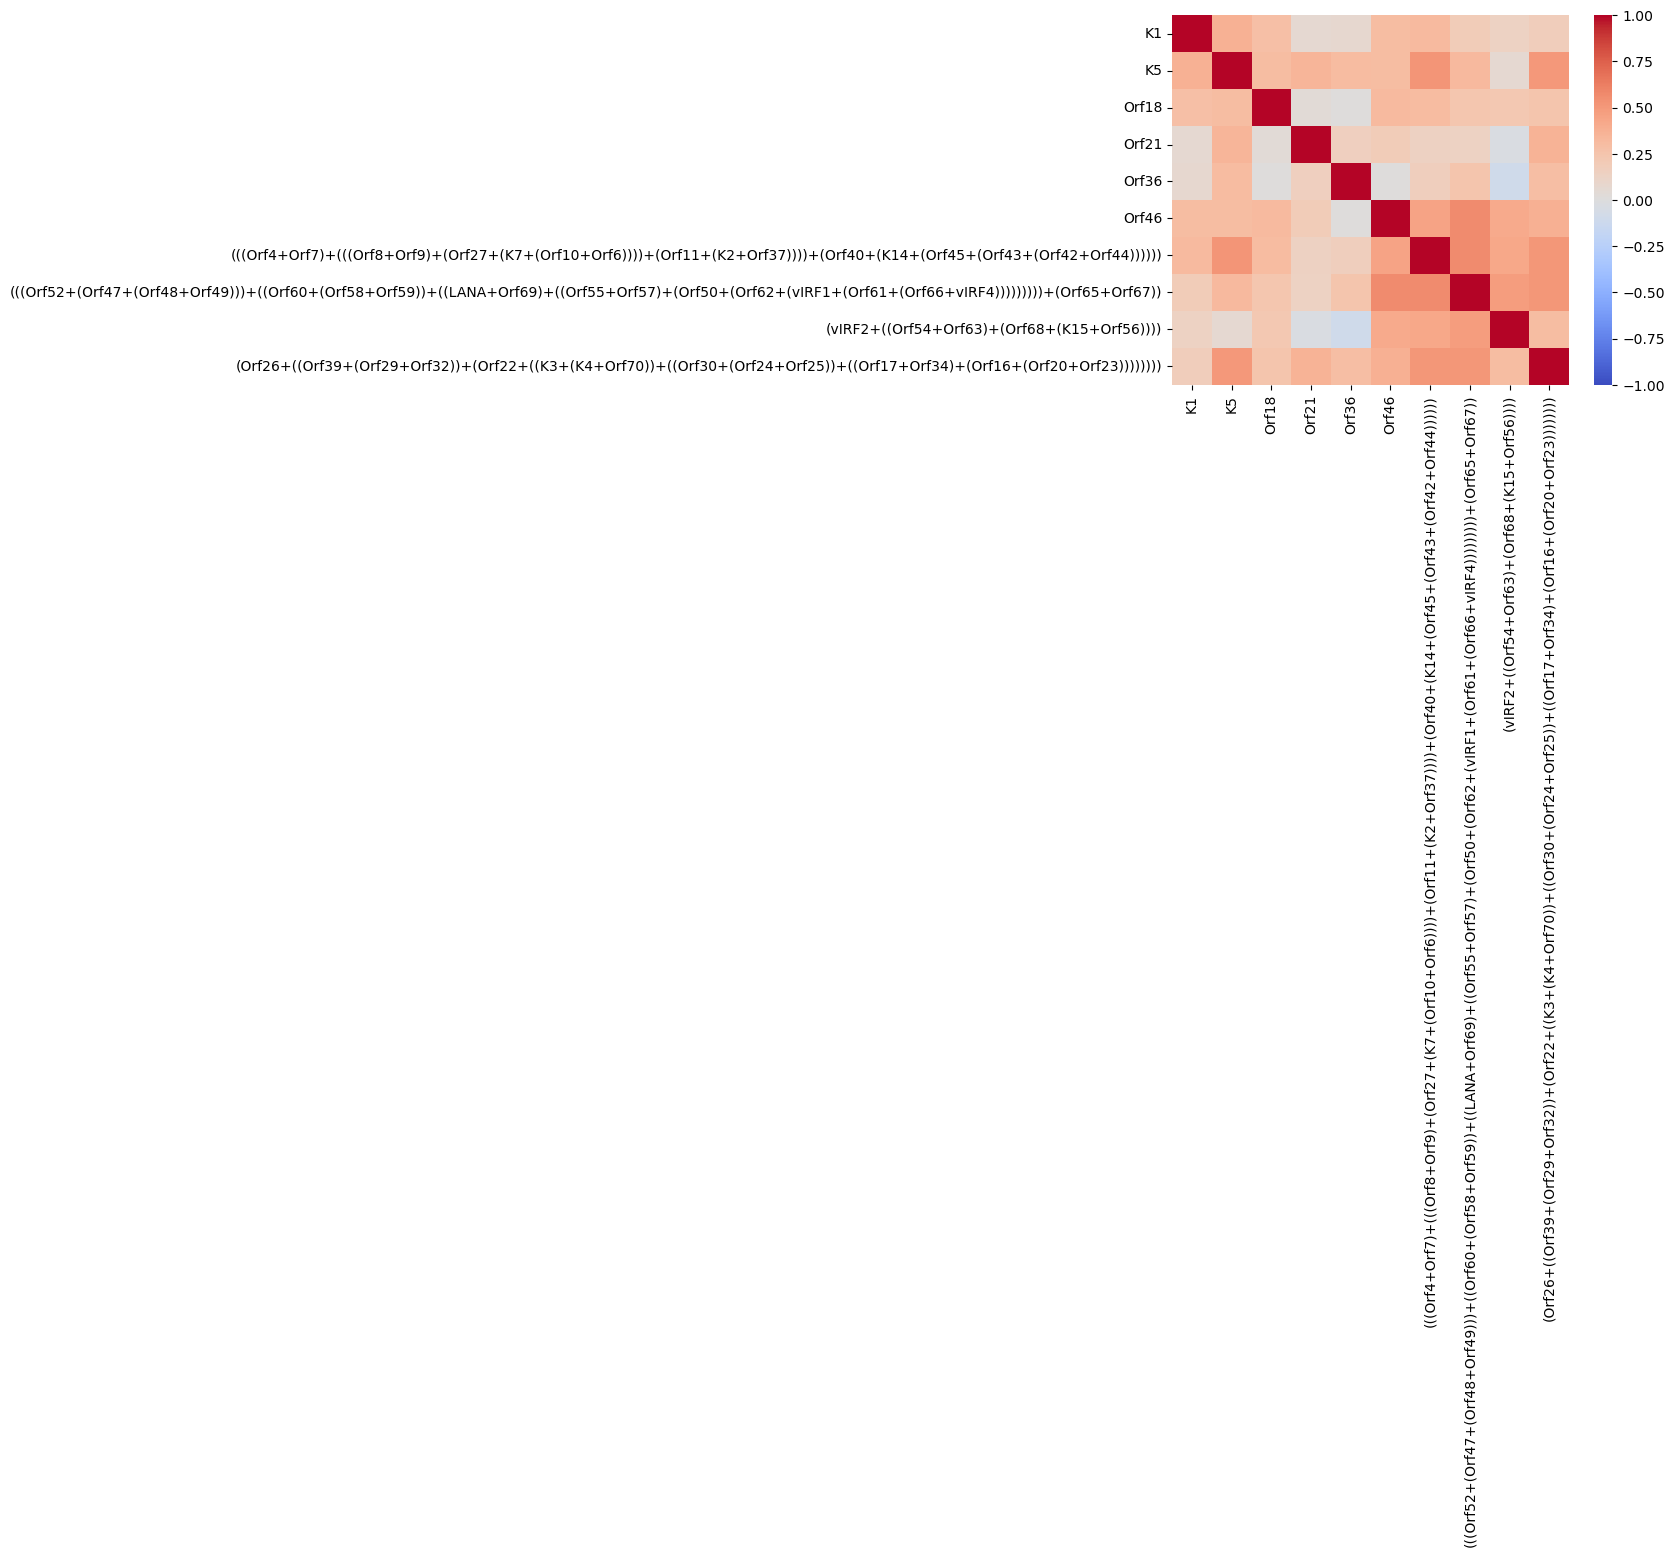

In [25]:
sns.heatmap(merged_matrix, cmap='coolwarm', vmin=-1, vmax=1)